# SVM

In [1]:
import pandas as pd

df = pd.read_csv('datasets/indianPima/diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
X = df[df.columns[:8]]

y = df['Outcome']

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [11]:
clf.score(X_test, y_test)

0.7559055118110236

# SVR (SVM for regression problem)

In [12]:
data = pd.read_csv('datasets/salary/Salary_Data.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [14]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
import numpy as np

X = data['YearsExperience']
y = data['Salary']

X = np.array(X)
X = X[:, np.newaxis]

In [16]:
from sklearn.svm import SVR

model = SVR(C = 1000, gamma = 0.05, kernel = 'rbf')

model.fit(X, y)

SVR(C=1000, gamma=0.05)

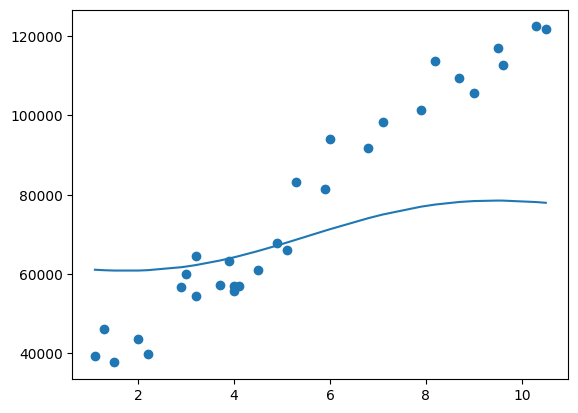

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.plot(X, model.predict(X))

# Grid Search (Model Tuning)

In [18]:
from sklearn.model_selection import GridSearchCV

model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

grid_search = GridSearchCV(model, parameters)

grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [19]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [20]:
better_model = SVR(C = 100000, gamma = 0.005, kernel = 'rbf')
better_model.fit(X,y)

SVR(C=100000, gamma=0.005)

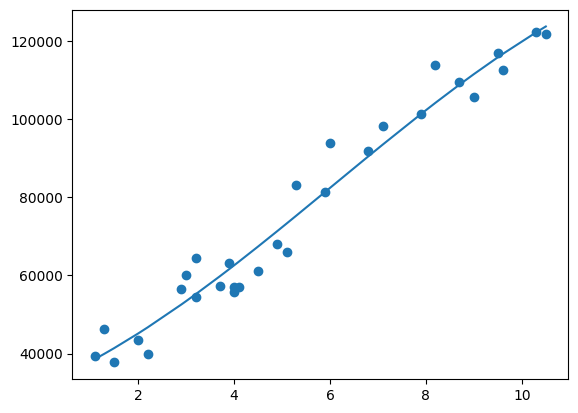

In [21]:
plt.scatter(X,y)
plt.plot(X, better_model.predict(X))